# Mall Customers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("D:\\tala\\mashin learning\\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df=df.drop("CustomerID" , axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [5]:
#droping duplicated datas
len(df.drop_duplicates())

200

In [6]:
#changing the name of columns
data=df.rename(mapper={"Annual Income (k$)" : "incom" , "Spending Score (1-100)" : "score"} , axis=1)
data.head()

,Gender,Age,incom,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


<AxesSubplot:xlabel='Age', ylabel='Density'>

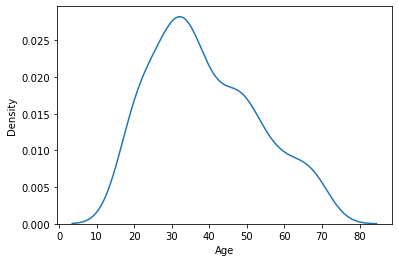

In [7]:
sns.kdeplot(data["Age"])

<AxesSubplot:xlabel='incom', ylabel='Density'>

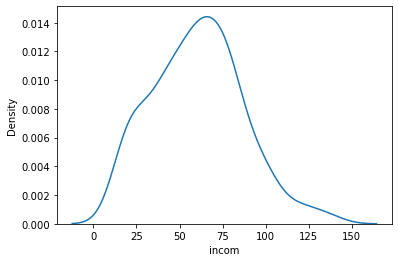

In [8]:
sns.kdeplot(data["incom"])

<AxesSubplot:xlabel='score', ylabel='Density'>

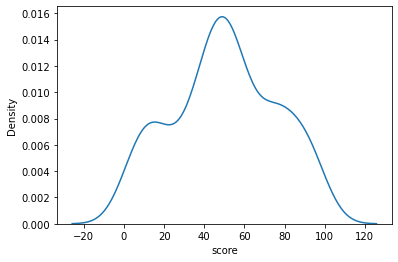

In [9]:
sns.kdeplot(data["score"])

<AxesSubplot:xlabel='Gender', ylabel='score'>

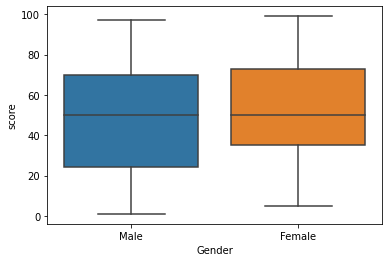

In [10]:
sns.boxplot(data=data , x="Gender" , y="score")

<AxesSubplot:xlabel='Gender', ylabel='Age'>

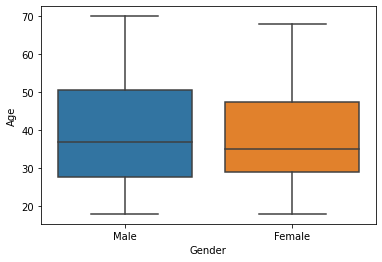

In [11]:
sns.boxplot(data=data , x="Gender" , y="Age")

<AxesSubplot:xlabel='Gender', ylabel='incom'>

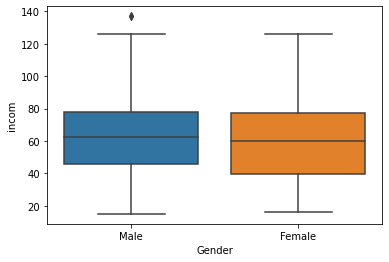

In [12]:
sns.boxplot(data=data , x="Gender" , y="incom")

<AxesSubplot:xlabel='Gender', ylabel='count'>

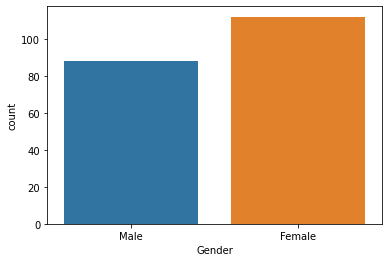

In [13]:
sns.countplot(x="Gender"  ,data=df)

<AxesSubplot:>

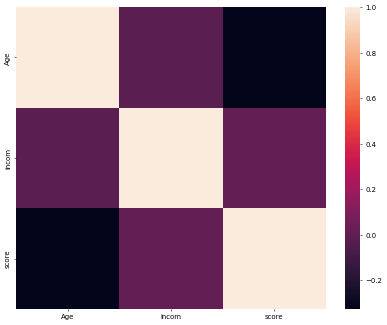

In [14]:
plt.figure(figsize=(10,8) , dpi=50)
sns.heatmap(data.corr())

<AxesSubplot:xlabel='incom', ylabel='score'>

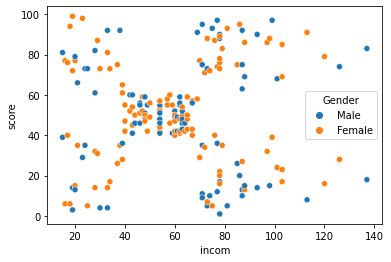

In [15]:
sns.scatterplot(data=data , x="incom",y="score" , hue="Gender")

<AxesSubplot:xlabel='incom', ylabel='Age'>

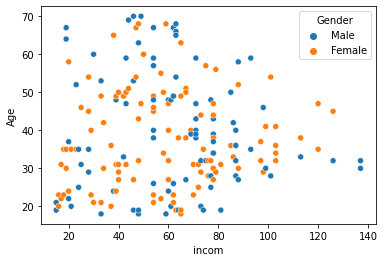

In [16]:
sns.scatterplot(data=data , x="incom",y="Age" , hue="Gender")

<AxesSubplot:xlabel='Age', ylabel='score'>

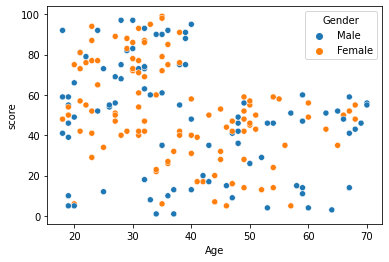

In [17]:
sns.scatterplot(data=data , x="Age",y="score" , hue="Gender")

In [18]:
data=pd.get_dummies(data , drop_first=True)
data.head(1)

,Age,incom,score,Gender_Male
0,19,15,39,1


In [19]:
inputs=data

In [20]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i , init="k-means++" , max_iter=300 ,n_init=10 , random_state=42)
    kmeans.fit(inputs)
    wcss.append(kmeans.inertia_)
    
pd.DataFrame(wcss ,columns=["wcss"])

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,wcss
0,308862.060000
1,212889.442455
2,143391.592360
3,104414.675342
4,75427.711824
5,58348.641363
6,51575.277931
7,44359.634641
8,40942.511170


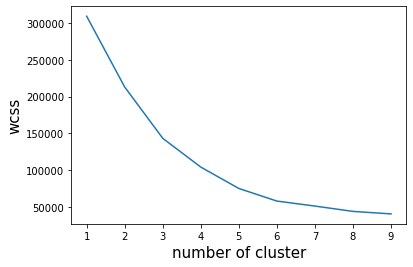

In [21]:
plt.plot(range(1,10) , wcss)

plt.xlabel("number of cluster" , size=15)
plt.ylabel("wcss" ,size=15)

plt.show()

In [22]:
kmeans=KMeans(5 , random_state=42)
kmeans.fit(inputs)

KMeans(n_clusters=5, random_state=42)

In [30]:
clusters=kmeans.fit_predict(inputs)
data["clusters"]=clusters
data.head()

,Age,incom,score,Gender_Male,clusters
0,19,15,39,1,0
1,21,15,81,1,4
2,20,16,6,0,0
3,23,16,77,0,4
4,31,17,40,0,0


In [31]:
data["clusters"].value_counts()

3    79
1    39
2    37
0    23
4    22
Name: clusters, dtype: int64

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='clusters', ylabel='count'>

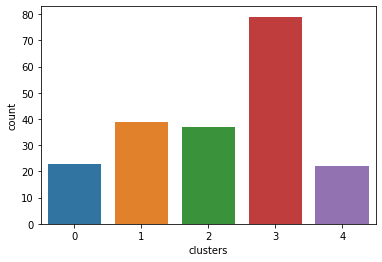

In [32]:
sns.countplot(data["clusters"])

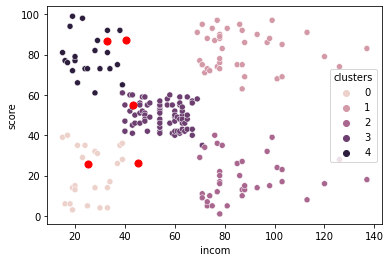

In [33]:
sns.scatterplot(data=data , x="incom",y="score" , hue="clusters")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1] ,s=50 ,c="red")

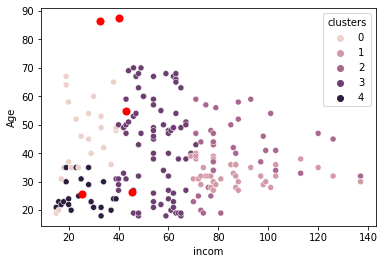

In [34]:
sns.scatterplot(data=data , x="incom",y="Age" , hue="clusters")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1] ,s=50 ,c="red")

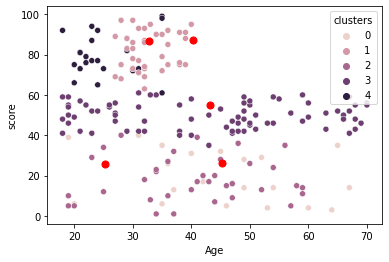

In [35]:
sns.scatterplot(data=data , x="Age",y="score" , hue="clusters")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1] ,s=50 ,c="red")